# Assignment 3B - Hasanat Hasan

### Problem 1 (50 points): The Lotka–Volterra equations
##### a) Write a program to solve these equations using the 4th-Order Runge–Kutta method for the case $\alpha$ = 1, $\beta$ = $\gamma$ = 0.5, and $\delta$ = 2, starting from the initial condition $x = y = 2$. Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t = 0$ to $t = 30$.

# Utilities Cell

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def lotka_voltera_eq(initial_populations: np.ndarray, time):
    alpha = 1
    beta  = 0.5
    gamma = 0.5
    delta = 2 
    init_x = initial_populations[0] # prey
    init_y = initial_populations[1] # pred
    next_x = alpha * init_x - beta * init_x * init_y
    next_y = gamma * init_x * init_y - delta * init_y

    return np.array([next_x, next_y])

def nonlinear_pendulum(phase_vector: np.ndarray, time: float):
    ''' 
    This function calculates the derivatives

    '''
    g = 9.81 # meters/s^2
    t = time
    l = 10*10**(-2) # meters
    C = 2
    Omega = 5
    ang_vel: float = phase_vector[0]
    theta: float = phase_vector[1]
    dtheta_dt: float = ang_vel
    dw_dt: float = -1*(g/l)*np.sin(theta) + C * np.cos(theta) * np.sin(Omega * t)

    return np.array([dw_dt, dtheta_dt])

def resonant_pendulum(phase_vector: np.ndarray, time: float):
    ''' 
    This function calculates the derivatives
    '''
    g = 9.81 # meters/s^2
    t = time
    l = 10*10**(-2) # meters
    C = 2
    Omega = 9.6 # needed to achieve resonance
    ang_vel: float = phase_vector[0]
    theta: float = phase_vector[1]
    dtheta_dt: float = ang_vel
    dw_dt: float = -1*(g/l)*np.sin(theta) + C * np.cos(theta) * np.sin(Omega * t)

    return np.array([dw_dt, dtheta_dt])


def calculate_k1(deriv_func, time: float, input: float | np.ndarray, height: float)->float:    
    ''' 
    Calculates k1 = f( t,y(t) )h
    '''
    return deriv_func( input, time) * height

def calculate_k2(deriv_func, time: float, input: float | np.ndarray, height: float, k1: float | np.ndarray)->float:
    ''' 
    Calculates k2 = f( t + h/2, y(t) + k1/2 )h
    '''
    y = input+(k1/2)
    t = time+(height/2) 
    return deriv_func( y, t) * height

def calculate_k3(deriv_func, time: float, input: float | np.ndarray, height: float, k2: float | np.ndarray)->float:
    ''' 
    Calculates k3 = f( t+h/2, y(t)+k2/2 )h
    '''
    y = input+(k2/2)
    t = time+(height/2) 
    return deriv_func( y, t) * height

def calculate_k4(deriv_func, time: float, input: float | np.ndarray, height: float, k3: float | np.ndarray)->float:
    ''' 
    Calculates k4 = f( t+h/2, y(t)+k3/2 )h
    '''
    y = input+(k3)
    t = time+(height) 
    return deriv_func( y, t) * height

def RK4_approx(deriv_func, initial_vector: list | np.ndarray, final_time: float, num_steps: int):
    ''' 
    RK4 Approximation:
    y(t+h) = y(t) + f( t+h/2, y(t)+f( t,y(t) )h/2 )h

    {
    k1 = f( t,y(t) )h\n
    k2 = f( t+h/2, y(t)+k1/2 )h\n
    k3 = f( t+h/2, y(t)+k2/2 )h\n
    k4 = f( t+h/2, y(t)+k3/2 )h\n
    y(t+h) = y(t) + 1/6 * (k1 + 2k2 + 2k3 +k4) + O(h^4)
    }

    convention: 
        initial_vector[0] = initial time
        initial_vector[1:] = initial position
    '''
    # initialing variables:
    t_0: float = initial_vector[0] 
    step_size: float = (final_time-t_0)/num_steps
    t_array: np.ndarray  = np.arange(t_0, final_time + step_size, step_size)
    solution_list: list = [initial_vector[1:]] 

    y = np.array(initial_vector[1:])
    for t_i in t_array[:-1]:
        k1 = calculate_k1(deriv_func, t_i, y, step_size)
        k2 = calculate_k2(deriv_func, t_i, y, step_size, k1)
        k3 = calculate_k3(deriv_func, t_i, y, step_size, k2)
        k4 = calculate_k4(deriv_func, t_i, y, step_size, k3)
        y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        solution_list.append(y)

    return solution_list, t_array

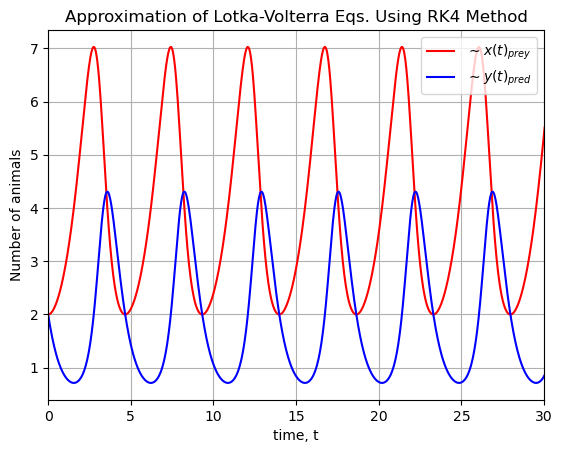

In [8]:
t_i = 0
init_fox = 2
init_rabbit = 2
initial_cond = [t_i,init_fox, init_rabbit] # initial vector: [t = 0, x = 2, y =2]

steps = 1000
t_f = 30

solutions_array, times_array = RK4_approx(lotka_voltera_eq, initial_cond, t_f, steps)

prey_population, pred_population = zip(*solutions_array)
prey_population, pred_population = np.array(prey_population), np.array(pred_population)
# plotting
plt.title(r"Approximation of Lotka-Volterra Eqs. Using RK4 Method")
plt.plot(times_array, prey_population, color='red', label=r"$\sim x(t)_{prey}$")
plt.plot(times_array, pred_population, color='blue', label=r"$\sim y(t)_{pred}$")
plt.xlabel("time, t")
plt.ylabel(r"Number of animals")
plt.xlim(0,t_f)
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### b) Describe in words what is going on in the system, in terms of rabbits and foxes
##### In the plots we can clearly see the periodicity of both fox and rabbit populations, and that they follow each other closely. When the rabbit population increases, so does the fox population. When the rabbit population reaches some critical point and decreases, the fox population follows. Also notices that the minimum number of rabbits is always 2 and ~1 for foxes.

# Problem 2 (50 points): The driven pendulum
##### A pendulum (like the one in lecture notes) can be driven by, for example, exerting a small oscillating force horizontally on the mass. Then the equation of motion for the pendulum becomes:
$$
\frac{d^2\theta}{dt^2} = -(g/l)\sin(\theta) + C\cos(\theta)\sin(\Omega t)
$$
##### where C and $\Omega$ are constants
##### a) Write a program to solve this equation for θ as a function of time with l = 10 cm, $C = 2 s^{−2}$, and $\Omega = 5s^{-1}$ and make a plot of $\theta$ as a function of time from $t = 0$ to $t = 100 s$. Start the pendulum at rest with $\theta = 0$ and $d\theta/dt = 0$. Using the 4th-Order Runge–Kutta is a better choice.

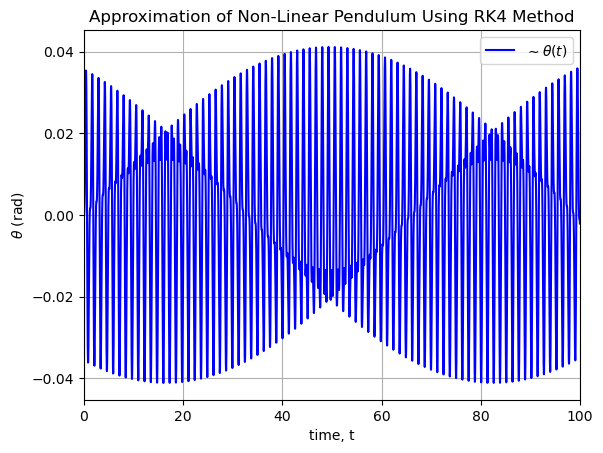

In [4]:
# inital values
t_i = 0
t_f = 100
steps = 10000
init_ang_vel = 0
init_theta = 0
initial_cond = [t_i,init_ang_vel, init_theta] # initial vector: [t = 0, x = 2, y =2]

# extract solutions
solutions_array, times_array = RK4_approx(nonlinear_pendulum, initial_cond, t_f, steps)
angular_vel_array, theta_array = zip(*solutions_array)
angular_vel_array, theta_array = np.array(angular_vel_array), np.array(theta_array)

# plotting
plt.title(r"Approximation of Non-Linear Pendulum Using RK4 Method")
# plt.plot(times_array, x_values, color='red', label=r"$\sim x(t)_{prey}$")
plt.plot(times_array, theta_array, color='blue', label=r"$\sim \theta(t)$")
plt.xlabel("time, t")
plt.ylabel(r"$\theta$ (rad)")
plt.xlim(0,t_f)
plt.legend(loc='upper right')
plt.grid()
plt.show()

##### b) Now change the value of Ω, while keeping C the same, to find a value for which the pendulum resonates with the driving force and swings widely from side to side. Make a plot for this case also

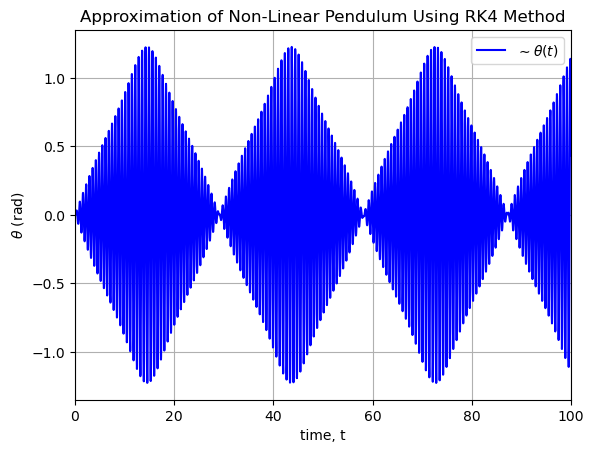

In [5]:
# inital values
t_i = 0
t_f = 100
steps = 10000
init_ang_vel = 0
init_theta = 0
initial_cond = [t_i,init_ang_vel, init_theta] 

# extract solutions
solutions_array, times_array = RK4_approx(resonant_pendulum, initial_cond, t_f, steps)
angular_vel_array, theta_array = zip(*solutions_array)
angular_vel_array, theta_array = np.array(angular_vel_array), np.array(theta_array)

# plotting
plt.title(r"Approximation of Non-Linear Pendulum Using RK4 Method")
plt.plot(times_array, theta_array, color='blue', label=r"$\sim \theta(t)$")
plt.xlabel("time, t")
plt.ylabel(r"$\theta$ (rad)")
plt.xlim(0,t_f)
plt.legend(loc='upper right')
plt.grid()
plt.show()

### It seems the value for $\Omega$ for which the system oscillates at resonant frequency is 9.6 , at $\Omega \sim 9.6$, the values of $\theta(t)$ are largest